In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

In [2]:
class LinearRegression:
    def __init__(self, rate=0.01, epochs=50, method='gradient', normalize=True, regularize=0.1, poly=2):
        """
        Basic constructor for linear regression.
        
        Parameters
        ----------
        rate : float (default 0.01)
            Learning rate.
        
        epochs : int (default 50)
            Quantity of iterations.
            
        method : str (default 'gradient')
            Method to solve the problem. It can be 'gaussian' or 'gradient'.
        
        normalize : bool (default True) 
            Normalize features to boost convergence.
        
        regularize : float (default 0.1)
            Avoid overfitting during learning.
        
        poly : int (default 2)
            Max polynomial power.
        
        """
        
        self.rate = rate
        self.epochs = epochs
        self.method = method
        self.normalize = normalize
        self.regularize = regularize
        self.poly = poly
    
    def data(self, X, y):
        """
        Preprocess data, generate weights.
        
        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.
            
        y : numpy.ndarray, shape (n_samples, 1) or (n_samples, n_labels)
            Target relative to X for classification or regression;
            None for unsupervised learning.
        
        Returns
        -------
        tuple(numpy.ndarray, numpy.ndarray, numpy.ndarray)
        
        """
        
        # normalize data
        if self.normalize:
            X = self.normalization(X)
        
        # add polynomial
        for i in range(self.poly - 1):
            new_poly_X = (X[:, 0] ** (i + 2)).reshape(len(X[:, 0]), 1)
            X = np.hstack((X, new_poly_X))
        
        # add bias
        Xtrain = np.hstack((np.ones((X.shape[0], 1)), X))
        ytrain = y.reshape((len(y), 1))
        theta = np.zeros((Xtrain.shape[1], 1))
        
        return Xtrain, ytrain, theta
    
    def fit(self, X, y):
        """
        Preprocess data, generate weights and train model.

        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            The training set of features.

        y : numpy.ndarray, shape (n_samples, 1) or (n_samples, n_labels)
            The training set of labels.
        
        """
        
        self.Xtrain, self.ytrain, self.theta = self.data(X, y)
        
        if self.method == 'gradient':
            self.gradient_descent()
        elif self.method == 'gaussian':
            self.theta = self.normal_equation()
    
    
    def hypothesis(self, theta, Xtrain):
        """Return multiplication of two matrices: theta and X features."""
        return np.dot(Xtrain, theta)
    
    def normal_equation(self):
        """Implement gaussian equation and return theta."""
        return np.dot(np.dot(np.linalg.inv(np.dot(self.Xtrain.T, self.Xtrain)), self.Xtrain.T), self.ytrain)
    
    def normalization(self, Xtrain):
        """Normalize X features and return it."""
        return (Xtrain - Xtrain.mean(axis=0)) / (Xtrain.max(axis=0) - Xtrain.min(axis=0))
    
    def cost(self):
        """Calculate cost function (error) and return it."""
        return 1 / (2 * self.Xtrain.shape[0]) * sum((self.hypothesis(self.theta, self.Xtrain) - self.ytrain) ** 2)
    
    def gradient_step(self):
        """Implement one gradient step and return current theta."""
        return self.theta - self.rate / len(self.Xtrain) * \
            sum((np.dot(self.Xtrain, self.theta) - self.ytrain) * self.Xtrain).reshape(self.theta.shape) + \
            self.regularize / len(self.theta) * sum(self.theta)
    
    def gradient_descent(self):
        """Implement gradient descent, until convergence."""
        for iteration in range(self.epochs):
            self.theta = self.gradient_step()
    
    def predict(self, X): 
        """
        Compute hypothesis using trained weights and given Xtest.
        
        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            The training set of features. 
        
        Returns
        -------
        numpy.ndarray
            Predicted value or multiple values.
        
        """
        
        if type(X) not in (np.ndarray, list):
            X = np.array([X / 100]).reshape((1, 1))
            
            if self.poly > 1:
                for i in range(self.poly - 1):
                    new_poly_X = (X[:, 0] ** (i + 2)).reshape((1, 1))
                    X = np.hstack((X, new_poly_X))
            
            X = np.hstack((np.zeros((1, 1)), X))
            
            Xpredict = X
            
        else:
            Xpredict = np.concatenate((np.ones(len(X))[:, np.newaxis], X), axis=1).reshape((len(Xpredict), 1))
        
        return self.hypothesis(self.theta, Xpredict)[0, 0]
    
    def show(self):
        """Plot the history of the cost function during all time of training."""
        plt.title('Data')
        plt.scatter(self.Xtrain[:, 1], self.ytrain, c='b', label='data')
        plt.plot(self.Xtrain[:, 1], np.dot(self.Xtrain, self.theta), c='r', label='linear regression')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
        
        print('Theta: ', *self.theta.T)
        print('Cost: ', self.cost()[0])

## Testing

### Example 1

In [3]:
test = LinearRegression(rate=1.3, epochs=500, normalize=True, poly=2, regularize=0)

In [4]:
X = np.arange(-50, 50, 1).reshape((100, 1))
y = X ** 2 + np.random.randn(100).reshape((100, 1)) * 100 + 50

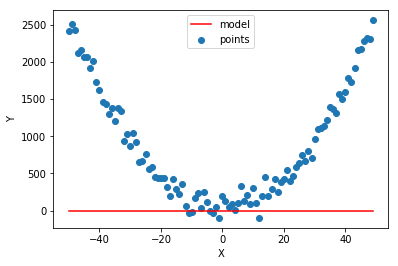

In [5]:
plt.scatter(X, y, label='points')
plt.plot(X, X * 0, c='r', label='model')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
test.fit(X, y)

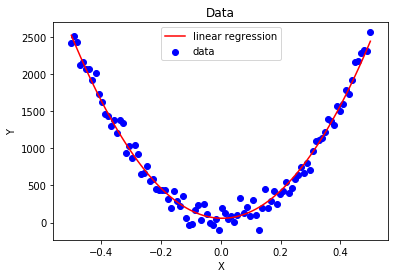

Theta:  [   58.923225     -79.83425112  9686.96561846]
Cost:  5287.24321485


In [7]:
test.show()

In [8]:
print('Predicted: ', test.predict(30))
print('Actual: ', 30 ** 2)

Predicted:  847.876630327
Actual:  900


### Example 2

In [9]:
test = LinearRegression(rate=1, epochs=800, normalize=True, poly=3, regularize=0.001)

In [10]:
X = np.arange(-50, 50, 2).reshape((50, 1))
y = X ** 3 + np.random.randn(50).reshape((50, 1)) * 10 + 150

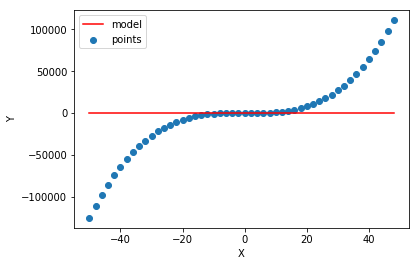

In [11]:
plt.scatter(X, y, label='points')
plt.plot(X, X * 0, c='r', label='model')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [12]:
test.fit(X, y)

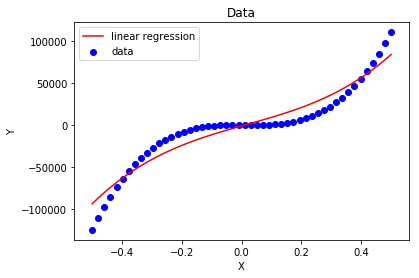

Theta:  [   -905.68017809  100599.89076188  -15531.62397158  309329.46671915]
Cost:  80695490.167


In [13]:
test.show()

In [14]:
print('Predicted: ', test.predict(30))
print('Actual: ', 30 ** 3)

Predicted:  37134.0166725
Actual:  27000
